# SVM Project3:

# Using SVM with Social Network Ads dataset to classify Purchased or Not Purchased.
######

|**Prepared By:**| Rayyan Ahmed
|------------|--------------------
|**Date:**|2nd August, 2024

In [3]:
import pandas as pd

df = pd.read_csv('10-pr3-Social_Network_Ads_CSVDataSet.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.shape

(400, 5)

In [163]:
x = df.drop(['Purchased','Gender','User ID'], axis = 1)
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [165]:
y = df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


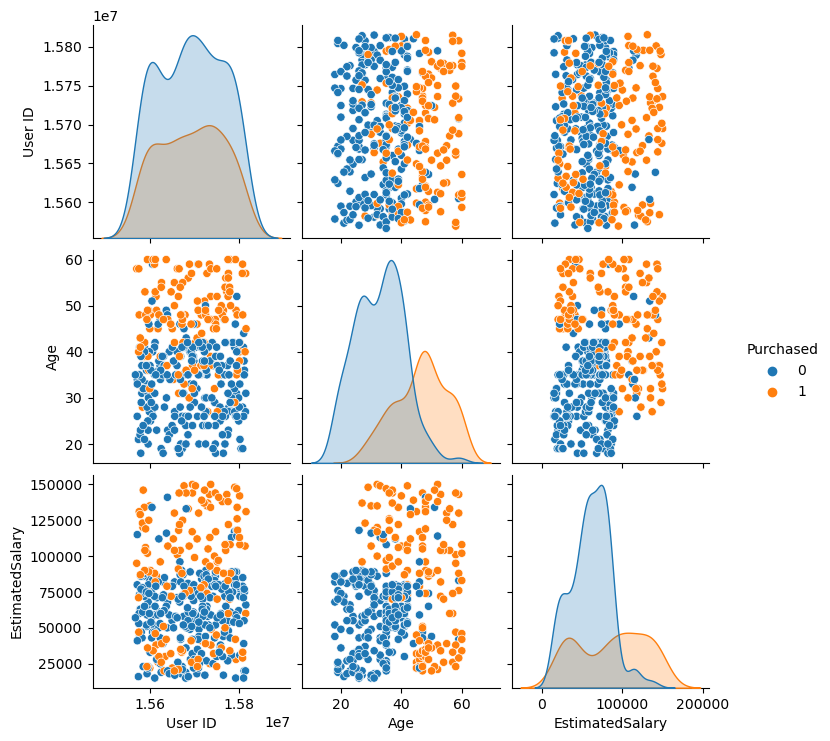

In [166]:
import seaborn as sns

sns.pairplot(df, hue = 'Purchased')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

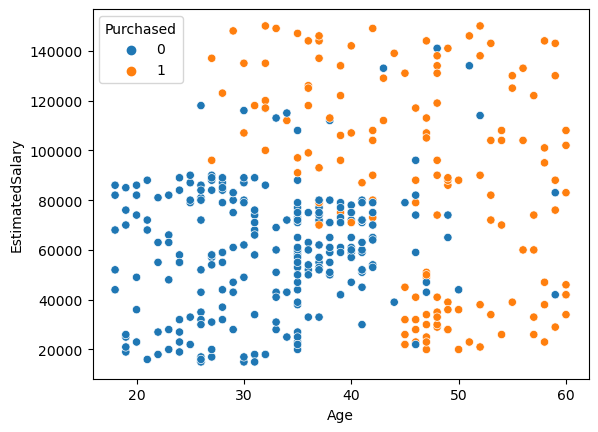

In [167]:
sns.scatterplot( data = df, x = 'Age', y = 'EstimatedSalary', hue = 'Purchased')

In [168]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.1, random_state = 0)

In [169]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((360, 2), (40, 2), (360,), (40,))

In [170]:
from sklearn.svm import SVC
model = SVC()

In [171]:
model.fit(x_train, y_train)


SVC()

In [172]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [173]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

print(metrics.accuracy_score(y_test, model.predict(x_test)))
print(f'Model Accuracy Rate: {model.score(x_test, y_test) * 100:.3f} %')
print(classification_report(y_test, model.predict(x_test)))
print(confusion_matrix(y_test, model.predict(x_test)))

0.9
Model Accuracy Rate: 90.000 %
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.83      0.62      0.71         8

    accuracy                           0.90        40
   macro avg       0.87      0.80      0.83        40
weighted avg       0.90      0.90      0.89        40

[[31  1]
 [ 3  5]]


In [174]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x1_train = ss.fit_transform(x_train)
x1_test = ss.transform(x_test)


In [176]:
hello = SVC()
hello.fit(x1_train, y_train)
hp = hello.predict(x1_test)

print(metrics.accuracy_score(y_test, hp))
print(f'Model Accuracy Rate: {hello.score(x1_test, y_test) * 100:.3f} %')
print(classification_report(y_test, hp))
print(confusion_matrix(y_test, hp))

0.925
Model Accuracy Rate: 92.500 %
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.78      0.88      0.82         8

    accuracy                           0.93        40
   macro avg       0.87      0.91      0.89        40
weighted avg       0.93      0.93      0.93        40

[[30  2]
 [ 1  7]]
